In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import os

In [5]:
# Define the input shape of your images
input_shape = (224, 224, 3)  # Adjust the dimensions based on your images

In [6]:
# Define the CNN model
model = models.Sequential()

In [7]:
# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [8]:
# Flatten the output to feed into dense layers
model.add(layers.Flatten())

In [9]:
# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Optional dropout layer for regularization
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       

In [11]:
# Set up data generators to load and preprocess images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

In [12]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

training set

In [13]:
train_generator = train_datagen.flow_from_directory(
    "C:\DSGP_Model_Training_In_Colab\Train",  # Path to your train folder
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='binary',  # Binary classification
    classes=['Knee bone', 'NonKnee bones'],  # Class labels
    shuffle=True  # Shuffle the data

)

Found 7486 images belonging to 2 classes.


In [14]:
validation_generator = validation_datagen.flow_from_directory(
    "C:\DSGP_Model_Training_In_Colab\Validate",  # Path to your validate folder
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='binary',
    classes=['Knee bone', 'NonKnee bones']
)

Found 1557 images belonging to 2 classes.


In [23]:
# Load test data
test_generator = test_datagen.flow_from_directory(
    'C:\DSGP_Model_Training_In_Colab\Test',
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='binary',
    #color_mode='grayscale',
    shuffle=False  # Important: Do not shuffle the test data
)

Found 251 images belonging to 2 classes.


In [15]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs based on your needs
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10


234/234 [==============================] - 374s 2s/step - loss: 0.2915 - accuracy: 0.8926 - val_loss: 0.1110 - val_accuracy: 0.9563
Epoch 2/10
234/234 [==============================] - 231s 985ms/step - loss: 0.1034 - accuracy: 0.9687 - val_loss: 0.0950 - val_accuracy: 0.9672
Epoch 3/10
234/234 [==============================] - 211s 901ms/step - loss: 0.0680 - accuracy: 0.9824 - val_loss: 0.0504 - val_accuracy: 0.9794
Epoch 4/10
234/234 [==============================] - 219s 934ms/step - loss: 0.0685 - accuracy: 0.9818 - val_loss: 0.0591 - val_accuracy: 0.9769
Epoch 5/10
234/234 [==============================] - 232s 989ms/step - loss: 0.1213 - accuracy: 0.9666 - val_loss: 0.1596 - val_accuracy: 0.9544
Epoch 6/10
234/234 [==============================] - 267s 1s/step - loss: 0.0731 - accuracy: 0.9790 - val_loss: 0.0599 - val_accuracy: 0.9717
Epoch 7/10
234/234 [==============================] - 263s 1s/step - loss: 0.0633 - accuracy: 0.9825 - val_loss: 0.0567 - val_ac

In [16]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_generator, verbose=2)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")


49/49 - 11s - loss: 0.0662 - accuracy: 0.9698 - 11s/epoch - 232ms/step
Validation Loss: 0.0662, Validation Accuracy: 0.9698


In [17]:
# Get training and validation accuracy
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Get training and validation loss
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Print or use the obtained metrics as needed
print("Training Accuracy:", train_accuracy[-1])
print("Validation Accuracy:", validation_accuracy[-1])

print("Training Loss:", train_loss[-1])
print("Validation Loss:", validation_loss[-1])

Training Accuracy: 0.9804969429969788
Validation Accuracy: 0.9698137640953064
Training Loss: 0.07056572288274765
Validation Loss: 0.06623703986406326


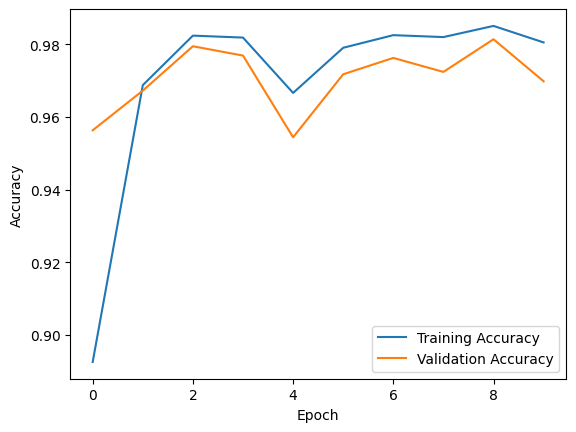

In [18]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


8/8 [==============================] - 6s 613ms/step
Confusion Matrix for Testing Dataset:
[[108   2]
 [  1 140]]


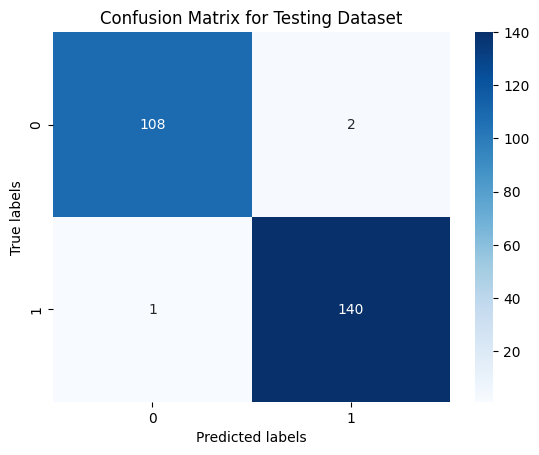

In [24]:
# Generate predictions for the testing dataset
test_predictions = model.predict(test_generator)
test_predictions_rounded = np.round(test_predictions)

# Get true labels for the testing dataset
test_true_labels = test_generator.classes

# Calculate confusion matrix for the testing dataset
conf_matrix_test = confusion_matrix(test_true_labels, test_predictions_rounded)

# Print confusion matrix for testing dataset
print("Confusion Matrix for Testing Dataset:")
print(conf_matrix_test)

# Visualize confusion matrix for testing dataset
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Testing Dataset')
plt.show()


In [39]:
from sklearn.metrics import classification_report

# Generate classification report for the testing dataset
report = classification_report(test_true_labels, test_predictions_rounded, target_names=['NonKnee bones', 'Knee bone'])

# Print classification report
print("Classification Report for Testing Dataset:")
print(report)


Classification Report for Testing Dataset:
               precision    recall  f1-score   support

NonKnee bones       0.99      0.98      0.99       110
    Knee bone       0.99      0.99      0.99       141

     accuracy                           0.99       251
    macro avg       0.99      0.99      0.99       251
 weighted avg       0.99      0.99      0.99       251



8/8 - 4s - loss: 0.1254 - accuracy: 0.9841 - 4s/epoch - 507ms/step
Test Loss: 0.1254, Test Accuracy: 0.9841
break


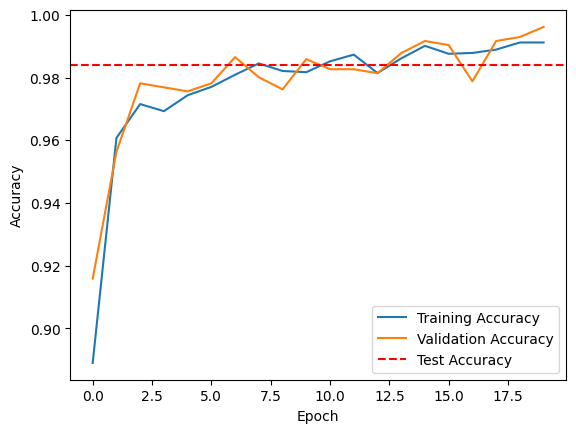

Found 251 images belonging to 2 classes.
8/8 [==============================] - 2s 224ms/step - loss: 0.1254 - accuracy: 0.9841
Test accuracy: 0.98


In [85]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

print("break")

# Add the test accuracy to the chart
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'C:\DSGP_Model_Training_In_Colab\Test',  # Specify your test folder path
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy:.2f}")

In [86]:
# Save the model to a file
model.save('knee_identifier.h5')


c:\Users\chanu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [87]:
# Load the saved model
loaded_model = load_model('knee_identifier.h5')

# Directory containing the test images
test_images_dir = 'C:\DSGP_Model_Training_In_Colab\Test'

In [88]:
from PIL import ImageEnhance, Image

In [89]:
# Load the saved model
loaded_model = load_model('knee_identifier.h5')

# Directory containing the test images
testimagesdir = "C:\DSGP_Model_Training_In_Colab\Check"
# Loop through each file in the directory
for filename in os.listdir(testimagesdir):
        # Construct the full file path
        img_path = os.path.join(testimagesdir, filename)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Rescale to match the training data


        # Make predictions using the loaded model
        predictions = loaded_model.predict(img_array)

        # Display the result
        if predictions[0][0] < 0.5:
            print(f"{filename}: Predicted - Knee Bone")
        else:
            print(f"{filename}: Predicted - Non-Knee Bone")

1/1 [==============================] - 0s 399ms/step
chest-x-ray-29.jpg: Predicted - Non-Knee Bone
1/1 [==============================] - 0s 49ms/step
download.jpeg: Predicted - Non-Knee Bone
1/1 [==============================] - 0s 48ms/step
ICE-006-Knee-XR-Segond.jpeg: Predicted - Knee Bone
1/1 [==============================] - 0s 47ms/step
injured-deteroriated-knee-x-ray-768x1024.jpg: Predicted - Non-Knee Bone
1/1 [==============================] - 0s 40ms/step
Pelvis xray (859).png: Predicted - Non-Knee Bone
1/1 [==============================] - 0s 43ms/step
standin-ap-xr-with-med-oa-g-1.webp: Predicted - Knee Bone
